In [1]:
input_dim = 13
model_file = "Model/model.cpkt"
num_clusters = 4

import json
import matplotlib.pyplot as plt
from matplotlib.path import Path
import numpy as np
import os
import pandas as pd
import scipy
import tensorflow as tf

from base import load_encoder, load_data

import sys
sys.path.insert(0, "../Code/")
from explain_sync import explain, apply

def load_model(input_dim = input_dim, model_file = model_file):
    return load_encoder(input_dim, model_file)


In [2]:
###
# Load Data & Configuration
###

x, y = load_data()

with open("vertices.json") as json_file:  
    all_vertices = json.load(json_file)


INFO:tensorflow:Restoring parameters from Model/model.cpkt


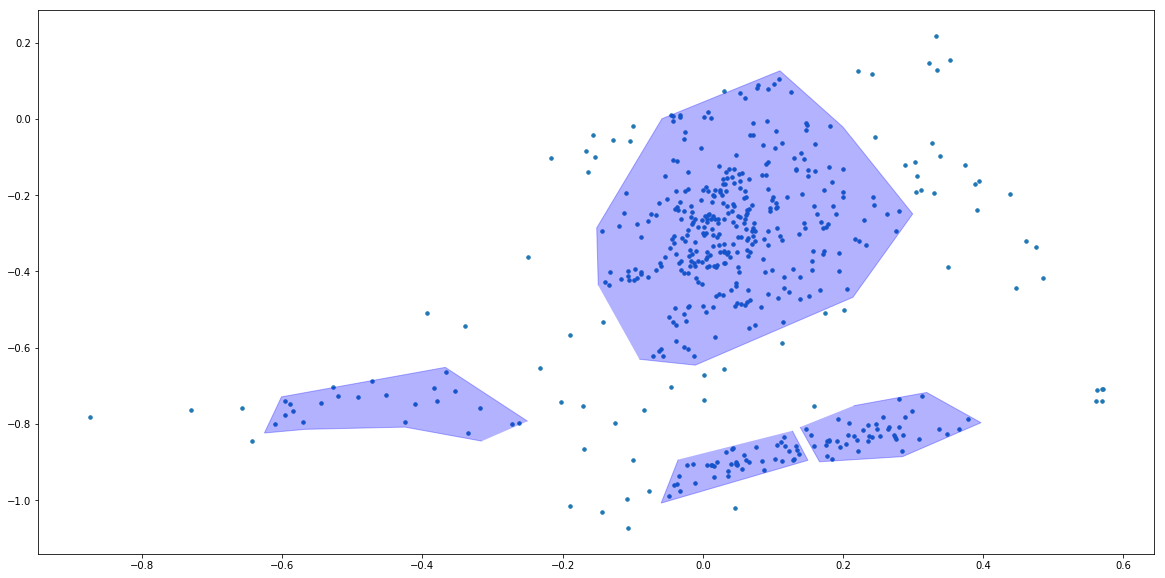

In [3]:
###
# Visualize the data and the marked clusters
###

sess, rep, X, D = load_model()

data_rep = sess.run(rep, feed_dict={X: x, D: np.zeros((1, input_dim))})

fig, ax = plt.subplots(figsize=(20, 10))
patches = []

for i in range(num_clusters):
    line = plt.Polygon(all_vertices[i], closed=False, color="blue", alpha=0.3)
    ax.add_line(line)

plt.scatter(data_rep[:, 0], data_rep[:, 1], s = 12)

plt.show()
plt.close()

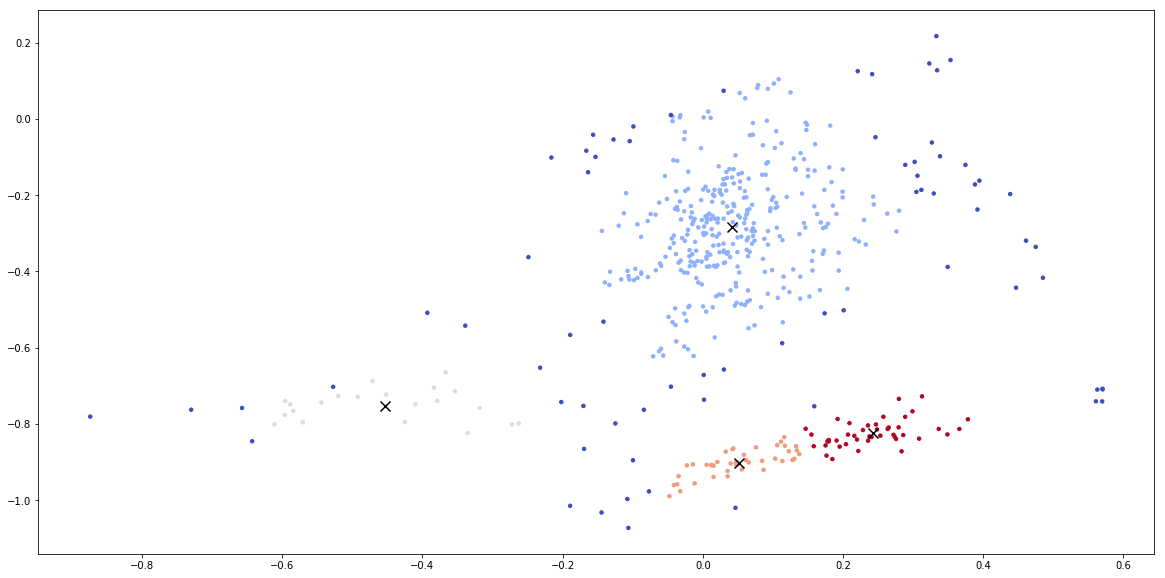

In [4]:
###
# Find the datapoints in each marked cluster
###

m = data_rep.shape[0]
cluster = -1.0 * np.ones((m))
indices = [[]] * num_clusters
centers = [[]] * num_clusters
for i in range(num_clusters):
    path = Path(all_vertices[i])
    indices[i] = []
    for j in range(m):
        if path.contains_points(data_rep[j].reshape((1,2))):
            cluster[j] = i
            indices[i].append(j)
    centers[i] = np.mean(data_rep[indices[i], :], axis = 0)
    
centers = np.array(centers)

fig, ax = plt.subplots(figsize=(20, 10))
patches = []
    
plt.scatter(data_rep[:, 0], data_rep[:, 1], s = 12, c = cluster, cmap = plt.cm.coolwarm)
plt.scatter(centers[:, 0], centers[:, 1], c = "black", marker = "x", s = 100)

plt.show()
plt.close()   

In [5]:
###
# Compute the cluster explanations
###

os.system("rm -rf explanation")
deltas = explain(load_model, x, data_rep, indices, dispersion = 0.2, lambda_global = 0.75, num_points = 10, learning_rate = 0.01)

INFO:tensorflow:Restoring parameters from Model/model.cpkt
0 0.6214465
1 0.5921943783760071
2 0.5596860080957413
3 0.5251406383514405
8 0.5220079227322817
9 0.49141220635483984
25 0.4752200090356735
26 0.4574337163688005
28 0.44820709734044684
29 0.4249021042187412
65 0.4129717257413085
66 0.4000957077854409
67 0.39349494571508775
99 0.38694485707277393
101 0.3847308967847368
156 0.38008924067141703
157 0.37039839393009627
163 0.3613669131144246
164 0.34746921693781263
165 0.34610220165997074
213 0.3398955949722056
217 0.3352583792364835
428 0.3319714225314822
429 0.3210583186432212
698 0.3178543433643403
699 0.3150540725973566
716 0.3120269696678405
717 0.30899440831831265
863 0.3078234237360662
864 0.3057430960471367
1016 0.30224959259756584
1175 0.2981134656023178
1298 0.2927088416380465
1418 0.28818729759064965



From  0  to  1 

INFO:tensorflow:Restoring parameters from Model/model.cpkt


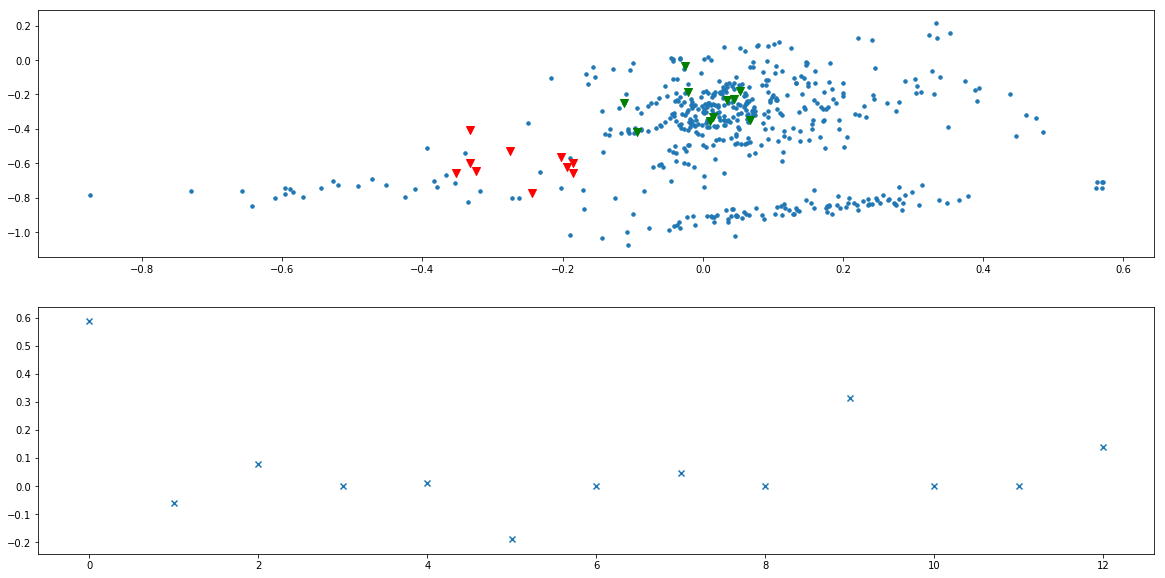


From  1  to  0 

INFO:tensorflow:Restoring parameters from Model/model.cpkt


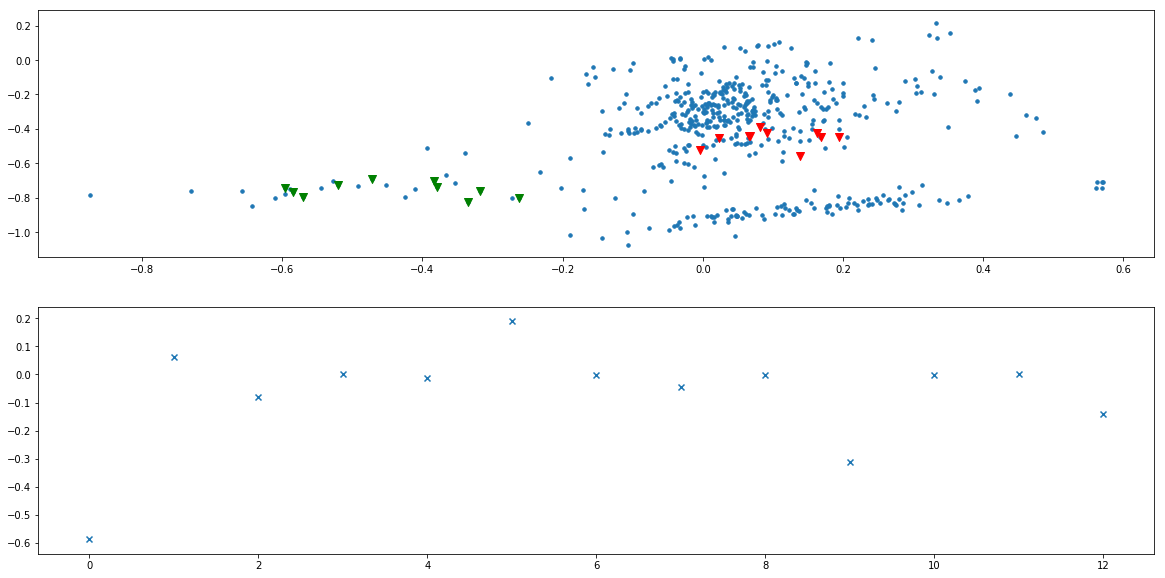


From  0  to  2 

INFO:tensorflow:Restoring parameters from Model/model.cpkt


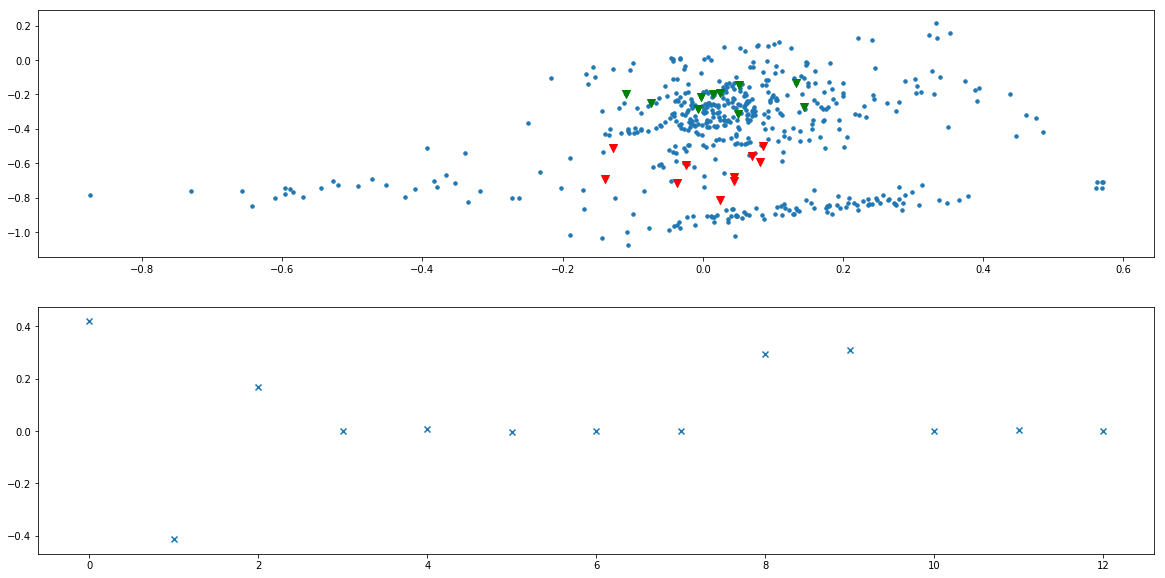


From  2  to  0 

INFO:tensorflow:Restoring parameters from Model/model.cpkt


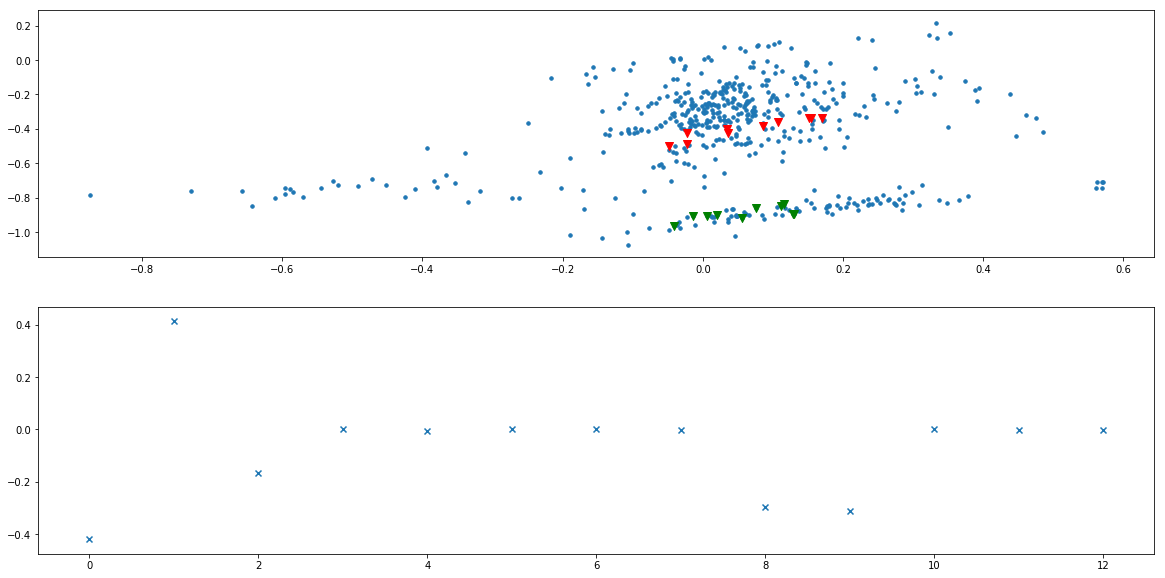


From  2  to  3 

INFO:tensorflow:Restoring parameters from Model/model.cpkt


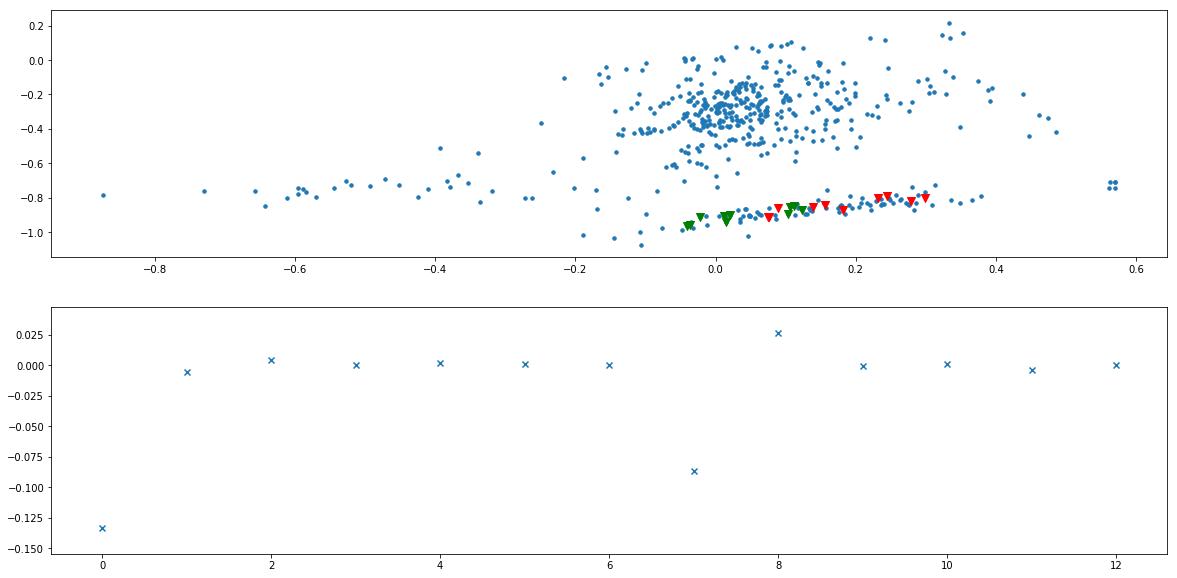


From  3  to  2 

INFO:tensorflow:Restoring parameters from Model/model.cpkt


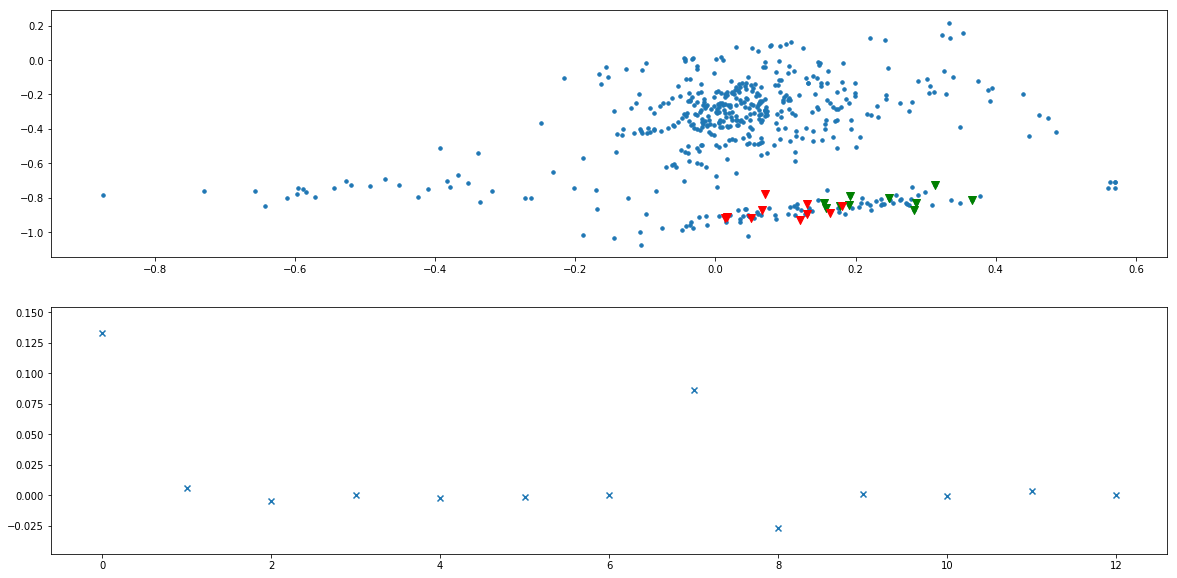

In [6]:
###
# Visualize the cluster explanations
###

def myplot(c1, c2):
    print("\nFrom ", c1, " to ", c2, "\n")
    
    if c1 == 0:
        d = deltas[c2 - 1]
    elif c2 == 0:
        d = -1.0 * deltas[c1 - 1]
    else:
        d = -1.0 * deltas[c1 - 1] + deltas[c2 - 1]
        
    apply(load_model, x, data_rep, indices, c1, np.reshape(d, (1, input_dim)), num_points = 10)
    
myplot(0, 1)
myplot(1, 0)
myplot(0, 2)
myplot(2, 0)

myplot(2, 3)
myplot(3, 2)
